# MATH 210 Introduction to Mathematical Computing

## March 8, 2023

* Numerical Differentiation
* Simpson's Rule

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical Differentiation

The Taylor series of $f(x)$ at $x=a$ is

$$
f(x) = \sum_{k=0}^{\infty} \frac{f^{(k)}(a)}{k!} (x-a)^k = f(a) + f'(a)(x - a) + \frac{f''(a)}{2}(x - a)^2 + \cdots
$$

We can rewrite the Taylor series in a couple of different ways

\begin{align*}
f(x + h) &= f(x) + f'(x)h + \frac{f''(x)}{2!}h^2 + \frac{f'''(x)}{3!}h^3 + \frac{f''''(x)}{4!}h^4 + \cdots \\
f(x - h) &= f(x) - f'(x)h + \frac{f''(x)}{2!}h^2 - \frac{f'''(x)}{3!}h^3 + \frac{f''''(x)}{4!}h^4 + \cdots
\end{align*}

Truncate after degree 1 and subtract formulas above to get central difference formula for $f'(x)$

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

Truncate after degree 2 and add formulas above to get central difference formula for $f''(x)$

$$
f''(x) \approx \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}
$$

Apply the second order central difference formula to $f''(x)$ to get

$$
f''''(x) \approx \frac{f''(x + h) - 2f''(x) + f''(x - h)}{h^2}
$$

and finally insert formula for $f''(x)$ to get the central difference formula for $f''''(x)$

$$
f''''(x) \approx \frac{\frac{f(x + 2h) - 2f(x + h) + f(x)}{h^2} - 2\left( \frac{f(x + h) - 2f(x) + f(x - h)}{h^2} \right) + \frac{f(x) - 2f(x - h) + f(x - 2h)}{h^2}}{h^2}
$$
$$
f''''(x) \approx \frac{f(x + 2h) - 4f(x + h) + 6f(x) - 4f(x - h) + f(x - 2h)}{h^4}
$$

Let's plot $f''''(x)$ for $f(x) = \sin(x^2)$ for $x \in [0,\sqrt{\pi/2}]$:

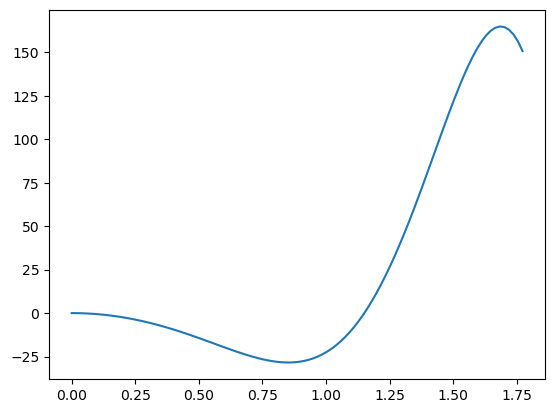

In [5]:
f = lambda x: np.sin(x**2)
h = 0.01
x = np.linspace(0,np.pi**0.5,100)
d4f = (f(x + 2*h) - 4*f(x + h) + 6*f(x) - 4*f(x - h) + f(x - 2*h))/h**4
plt.plot(x,d4f)
plt.show()

In [8]:
K4 = np.max(np.abs(d4f))
K4

164.85849946845653

## Simpson's Rule

$$
S_N(f) = \frac{\Delta x}{3} \sum_{k=1}^{N/2} ( f(x_{2k - 2}) + 4f(x_{2k - 1}) + f(x_{2k}))
$$

In [9]:
import scipy.integrate as spi

In [13]:
f = lambda x: np.sin(x**2)
N = 100
x = np.linspace(0,np.pi**0.5,N)
y = f(x)
I = spi.simps(y,x)
I

0.8948314005293039

The error bound is

$$
E_N^S(f) \leq \frac{(b - a)^5}{180 N^4} K_4
$$

where $|f''''(x)| \leq K_4$ for all $x \in [a,b]$.

In [14]:
(np.pi**0.5)**5/180/N**4*K4

1.6021881644812387e-07